In [1]:
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import preprocessing

%matplotlib inline

In [2]:
import sklearn
sklearn.__version__


'1.5.1'

In [3]:
df = pd.read_csv("../data/dataset.csv")
df.head(3)

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Цена,Без.ремонта,Дизайнерский,...,Остановка.1000,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000
0,1,1,0,35.1,7,9,1,1946322.0,0,0,...,12,13,10,0,5,1,31,13,10,26
1,2,5,0,95.2,1,10,1,5000000.0,0,0,...,12,13,10,0,5,1,31,13,10,26
2,3,1,0,34.0,1,5,0,1870000.0,0,0,...,12,13,9,0,4,1,26,13,11,28


In [4]:
df.columns

Index(['id', 'Количество.комнат', 'Студия', 'Общая.площадь', 'Этаж',
       'Этажей.в.доме', 'Парковка', 'Цена', 'Без.ремонта', 'Дизайнерский',
       'Евроремонт', 'Косметический', 'Балкон', 'Лоджия',
       'Совмещенный.санузел', 'Раздельный.санузел', 'Лифт', 'Грузовой.лифт',
       'Мусоропровод', 'Год.постройки', 'Аварийный',
       'Железобетонные.перекрытия', 'Смешанные.перекрытия',
       'Деревянные.перекрытия', 'Иные.перекрытия', 'Панельные.стены',
       'Блочные.стены', 'Деревянные.стены', 'Кирпичные.стены',
       'Монолитные.стены', 'Смешанные.стены', 'Школа.1000', 'ВУЗ.1000',
       'ТЦ.1000', 'Стоматология.1000', 'Почта.1000', 'Поликлиника.1000',
       'Парк.1000', 'Остановка.1000', 'Одежда..1000', 'Супер3кет.1000',
       'Кинотеатр.1000', 'Кафе.1000', 'АЗС.1000', 'Детский.сад.1000',
       'Бар.1000', 'Банк.1000', 'Аптека.1000'],
      dtype='object')

In [5]:
df = df.drop("id", axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Количество.комнат          1617 non-null   int64  
 1   Студия                     1617 non-null   int64  
 2   Общая.площадь              1617 non-null   float64
 3   Этаж                       1617 non-null   int64  
 4   Этажей.в.доме              1617 non-null   int64  
 5   Парковка                   1617 non-null   int64  
 6   Цена                       1617 non-null   float64
 7   Без.ремонта                1617 non-null   int64  
 8   Дизайнерский               1617 non-null   int64  
 9   Евроремонт                 1617 non-null   int64  
 10  Косметический              1617 non-null   int64  
 11  Балкон                     1617 non-null   int64  
 12  Лоджия                     1617 non-null   int64  
 13  Совмещенный.санузел        1617 non-null   int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Количество.комнат,1617.0,2.064935e+00,1.026922e+00,1.0,1.0,2.0,3.0,6.0
Студия,1617.0,4.885591e-02,2.156334e-01,0.0,0.0,0.0,0.0,1.0
Общая.площадь,1617.0,5.198565e+01,2.389153e+01,10.0,37.5,48.0,63.7,255.0
Этаж,1617.0,4.901051e+00,3.762452e+00,1.0,2.0,4.0,6.0,25.0
Этажей.в.доме,1617.0,8.889920e+00,4.821466e+00,2.0,5.0,9.0,10.0,27.0
Парковка,1617.0,1.422387e-01,3.494029e-01,0.0,0.0,0.0,0.0,1.0
Цена,1617.0,2.777592e+06,1.345226e+06,499000.0,1950000.0,2575000.0,3350000.0,14850000.0
Без.ремонта,1617.0,1.014224e-01,3.019806e-01,0.0,0.0,0.0,0.0,1.0
Дизайнерский,1617.0,3.586889e-02,1.860207e-01,0.0,0.0,0.0,0.0,1.0
Евроремонт,1617.0,9.523810e-02,2.936343e-01,0.0,0.0,0.0,0.0,1.0


In [8]:
df["Общая.площадь"]

0       35.1
1       95.2
2       34.0
3       41.0
4       42.0
        ... 
1612    46.0
1613    52.4
1614    65.0
1615    48.0
1616    34.0
Name: Общая.площадь, Length: 1617, dtype: float64

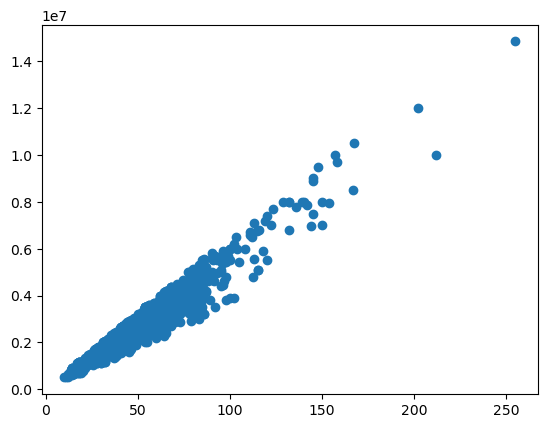

In [9]:
plt.scatter(df["Общая.площадь"], df["Цена"])

## Предварительная обработка данных

In [10]:
min_max_scaler_x = preprocessing.MinMaxScaler()
min_max_scaler_y = preprocessing.MinMaxScaler()

In [11]:
df_y = df[["Цена"]]
df_x = df[["Общая.площадь"]]

In [12]:
df_scaled_x = min_max_scaler_x.fit_transform(df_x)
df_scaled_y = min_max_scaler_y.fit_transform(df_y)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled_x, 
                                                    df_scaled_y[:, 0], 
                                                    test_size=0.2)

Базовая модель - линейная регрессия

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [15]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Оценка качества

In [16]:
y_pred = regressor.predict(X_test)

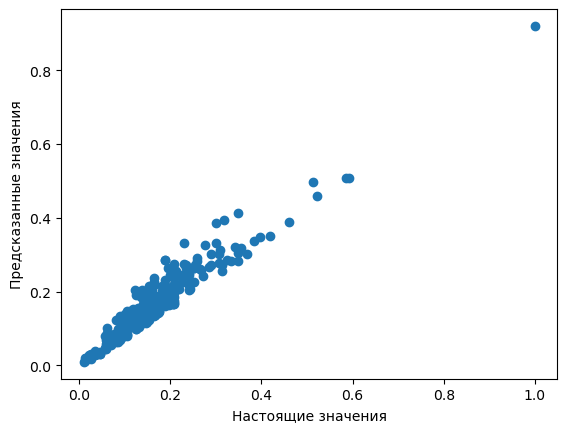

Корень из среднеквадратичной ошибки: 0.028993084836195112


In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

print('Корень из среднеквадратичной ошибки:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

y = ax + b

In [18]:
regressor.coef_

array([0.91850114])

In [20]:
regressor.intercept_

0.0017531460328520376

y = 0.92027096 * x + 0.0006612178756792708

In [21]:
with open('../models/scaler_x.pkl', 'wb') as f:
    pickle.dump(min_max_scaler_x, f)

In [22]:
with open('../models/scaler_y.pkl', 'wb') as f:
    pickle.dump(min_max_scaler_y, f)

In [23]:
with open('../models/lr_model.pkl', 'wb') as f:
    pickle.dump(regressor, f)

### Дерево решений и случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
?RandomForestRegressor

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=50, stop=400, num=4)]

max_depth = [int(x) for x in np.linspace(2, 50, num=3)]
max_depth.append(None)

min_samples_leaf = [1, 4]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
              }
param_grid

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf_random = GridSearchCV(estimator=rf, 
                         param_grid=param_grid, 
                         cv=5, 
                         verbose=2)

rf_random.fit(X_train, y_train)

In [ ]:
rf = rf_random.best_estimator_

In [ ]:
rf

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

e = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
e

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

print('Корень из среднеквадратичной ошибки:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
with open("rf.pkl", "wb") as f:
    pickle.dump(rf, f)

In [ ]:
with open("scaler_x.pkl", "wb") as f:
    pickle.dump(min_max_scaler_x, f)

In [ ]:
with open("scaler_y.pkl", "wb") as f:
    pickle.dump(min_max_scaler_y, f)

---

Логика для Flask-приложения

In [ ]:
with open("rf.pkl", "rb") as f:
    model = pickle.load(f)

In [ ]:
with open("scaler_x.pkl", "rb") as f:
    scaler_x = pickle.load(f)

In [ ]:
with open("scaler_y.pkl", "rb") as f:
    scaler_y = pickle.load(f)

In [ ]:
area = 55.5

In [ ]:
X_test.shape

In [ ]:
X_test

In [ ]:
params = [[area]]

In [ ]:
params = scaler_x.transform(params)

In [ ]:
y_pred = model.predict(params)

In [ ]:
y_pred

In [ ]:
scaler_y.inverse_transform([y_pred])